# Lecture 23 Supplement - Classifier Zoo

## Classifier Zoo

Meet the classifiers:

In [ ]:
classifiers = {
    "Nearest Neighbors": KNeighborsClassifier(3),
    "Logistic Regression": LogisticRegression(),
    "Linear SVM": SVC(kernel="linear", C=0.025),
    "RBF SVM": SVC(gamma=2, C=1),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "Neural Network": MLPClassifier((20, 100), alpha=1, max_iter=1000),
    "Naive Bayes": GaussianNB(),
}

Some matplotlib drudgery to plot the results of running a classifier on one of the above datasets:

In [ ]:
def plot_clf_results(ds_name, Z, accuracy, ax):
    """ Given a trained classifier clf, run it on dataset ds_name and plot
    the results in axes ax."""

    (Xtr, Xva, ytr, yva, xx, yy) = datasets[ds_name]
    


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.imshow(Z[::-1,:], cmap=cm, alpha=0.8, extent=[xx.min(), xx.max(), yy.min(), yy.max()])

    # Plot the training points
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(Xva[:, 0], Xva[:, 1], c=yva, cmap=cm_bright, edgecolors="w", alpha=0.4)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(ds_name)
    ax.text(xx.max() - 0.3, yy.min() + 0.3,
            ("%.2f" % accuracy).lstrip("0"), size=15, horizontalalignment="right")

This function trains a single classifier from the zoo above on each of the datasets and uses `plot_clf_results` to show the results.

In [ ]:
def classify_datasets(clf_name):
    clf = classifiers[clf_name]
    figure = plt.figure(figsize=(12, 5))
    figure.suptitle(clf_name)
    for i, ds_name in enumerate(datasets):
        (Xtr, Xva, ytr, yva, xx, yy) = datasets[ds_name]
        
        ## Train and run the model on the validation set:
        clf.fit(Xtr, ytr)
        accuracy = clf.score(Xva, yva)
        
        # Also generate a decision score for every point in the 2D plot we're making
        # so we can visualize the decision boundary
        if hasattr(clf, "decision_function"):
            # some classifiers give a "decision function" that outputs a score
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            # others output a probability of each class
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
        ## The Plotting Part:
        ax = plt.subplot(1, 3, i+1)
        plot_clf_results(ds_name, Z, accuracy, ax)

    plt.tight_layout()
    plt.show()

# # classify_datasets(names[3], classifiers[3])
# for clf_name in classifiers:
#     classify_datasets(classifiers, clf_name)


## A whirlwind tour of the zoo

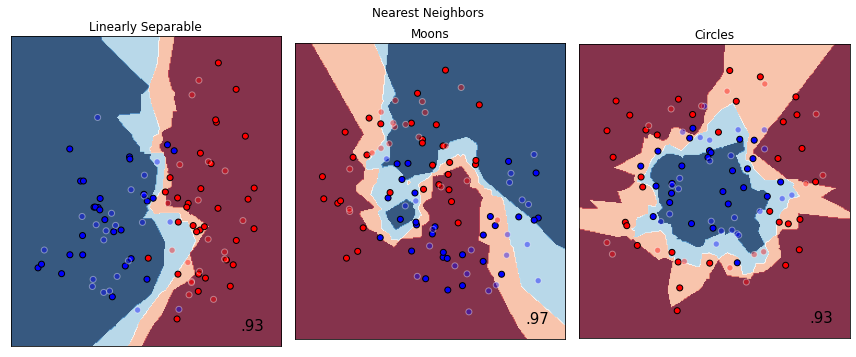

In [ ]:
classify_datasets("Nearest Neighbors")

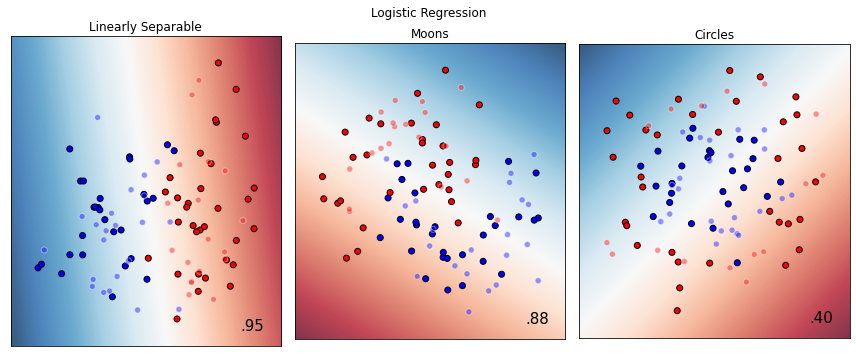

In [ ]:
classify_datasets("Logistic Regression")

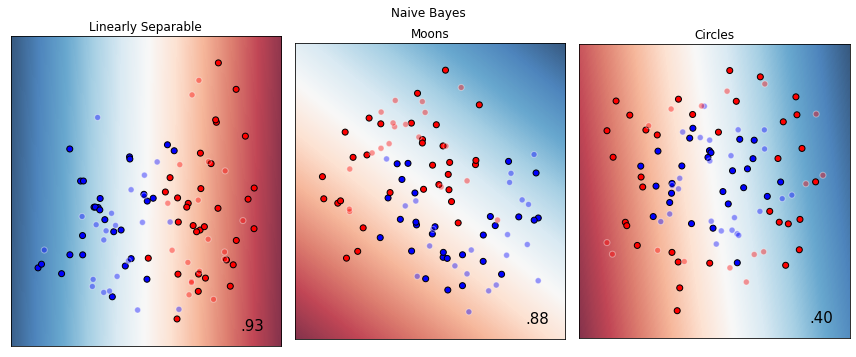

In [ ]:
classify_datasets("Linear SVM")

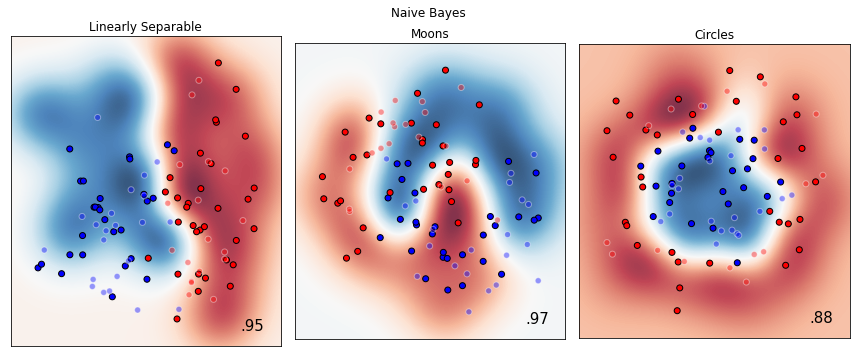

In [ ]:
classify_datasets("RBF SVM")

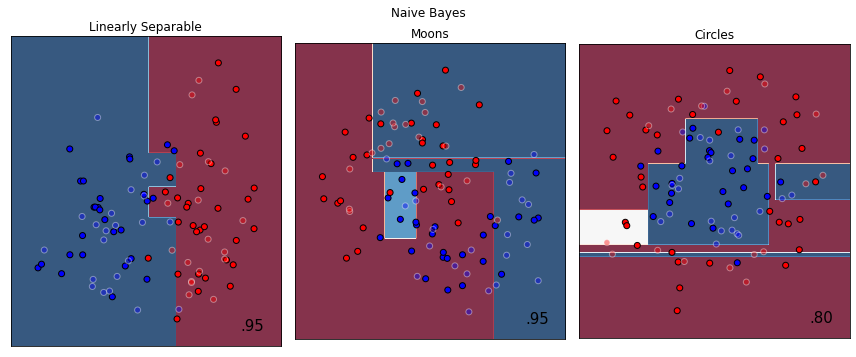

In [ ]:
classify_datasets("Decision Tree")

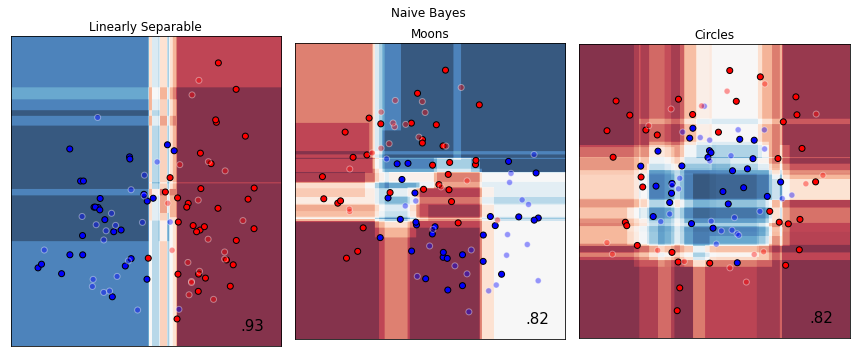

In [ ]:
classify_datasets("Random Forest")

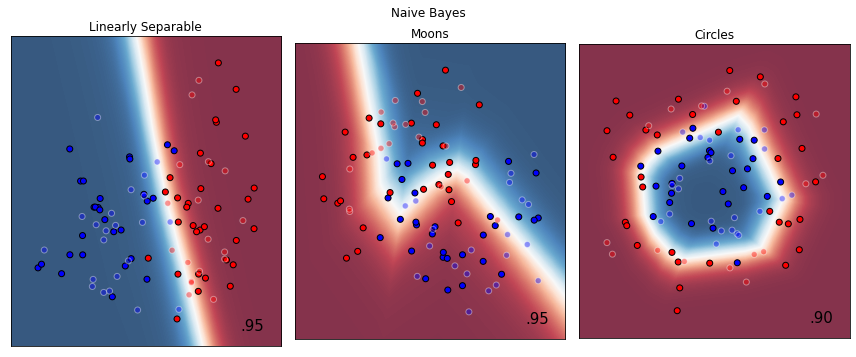

In [ ]:
classify_datasets("Neural Network")

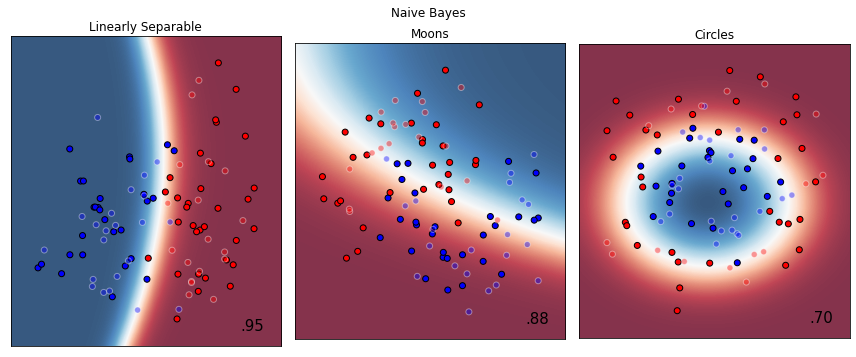

In [ ]:
classify_datasets("Naive Bayes")